# Hierarchical Clustering: Summary and Short Notes

**Summary:**

Hierarchical clustering is a method of cluster analysis that builds a hierarchy of clusters. It creates a tree-like structure (dendrogram) representing the nested relationships between data points. It can be agglomerative (bottom-up, starting with individual data points) or divisive (top-down, starting with all data points in one cluster). It doesn't require the number of clusters to be predefined, and it can be helpful in understanding the structure and relationships within the data.

**Short Notes:**

* **Agglomerative:** Starts with each data point as a separate cluster and iteratively merges the closest clusters until all data points are in a single cluster.
* **Divisive:** Starts with all data points in a single cluster and recursively divides clusters into smaller clusters until each data point is in its own cluster.
* **Dendrogram:** A tree-like diagram that visualizes the hierarchy of clusters and their relationships.
* **Linkage methods:** Define how the distance between clusters is calculated (e.g., single linkage, complete linkage, average linkage).
* **Distance metrics:** Define how the distance between data points is calculated (e.g., Euclidean distance, Manhattan distance).
* **Advantages:** No need to pre-specify the number of clusters, provides a hierarchical structure that can be visualized.
* **Disadvantages:** Can be computationally expensive for large datasets, sensitive to noise and outliers, difficult to interpret for large dendrograms.

**Key Concepts:**

* **Cluster:** A group of similar data points.
* **Distance:** A measure of similarity or dissimilarity between data points or clusters.
* **Linkage:** A method for calculating the distance between clusters.
* **Dendrogram:** A tree-like diagram representing the hierarchy of clusters.


**Applications:**

* **Customer segmentation:** Grouping customers based on purchasing behavior and demographics.
* **Gene expression analysis:** Identifying groups of genes with similar expression patterns.
* **Document clustering:** Organizing documents into topics or themes.
* **Image segmentation:** Grouping pixels based on color, texture, or other features.

This provides a brief overview of hierarchical clustering. Remember to consider the specific needs and properties of your data when choosing a suitable clustering algorithm and its parameters.


# Data Processing

## Import Library

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

[Resource](https://archive.ics.uci.edu/dataset/360/air+quality)

In [206]:
url = "https://raw.githubusercontent.com/SKY-TKP/AI-ENG/refs/heads/main/week10_dataset/AirQualityUCI.csv"
df = pd.read_csv(url, sep=";")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [207]:
df = df[df.columns[:-2]]
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


Assumption: Neglect Date, and Time

In [208]:
df = df.drop(["Date", "Time"], axis=1)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [209]:
df.isnull().sum()

,0
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114
PT08.S4(NO2),114
PT08.S5(O3),114


In [210]:
## Remove NaN
df = df.dropna()
df.isnull().sum()

,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0


In [211]:
len(df)

9357

In [212]:
## Change format number from x,xxx to x.xxx and all is float
df = df.replace(",", ".", regex=True)
df = df.apply(pd.to_numeric)
df.head()
df.dtypes

,0
CO(GT),float64
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),float64
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64
PT08.S4(NO2),float64
PT08.S5(O3),float64


## Plot Data

### Histogram

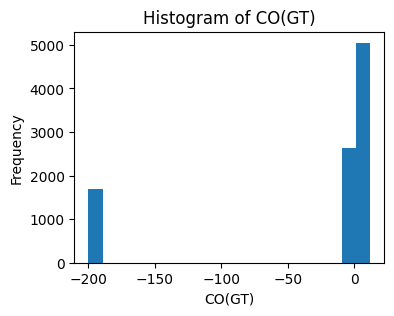

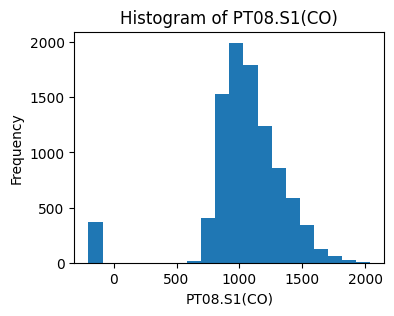

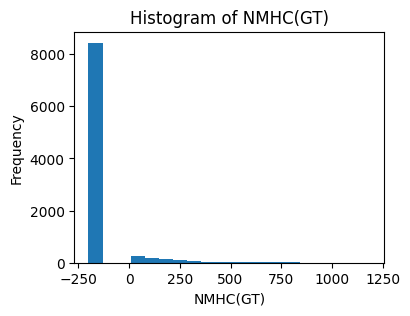

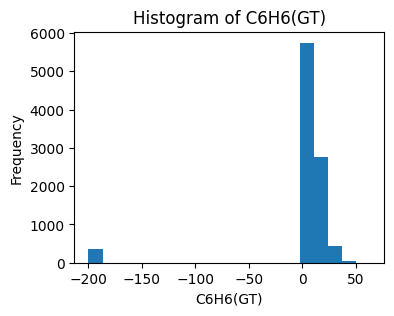

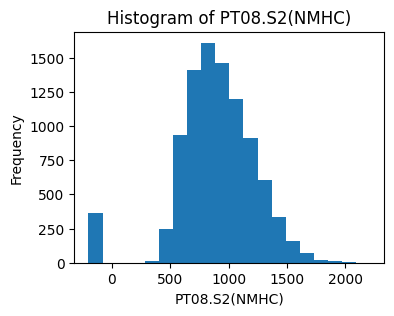

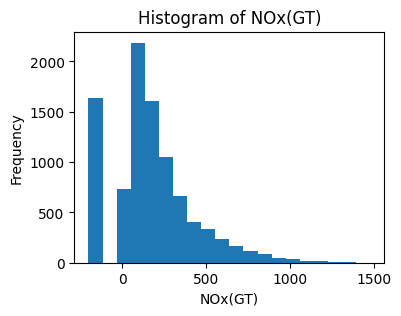

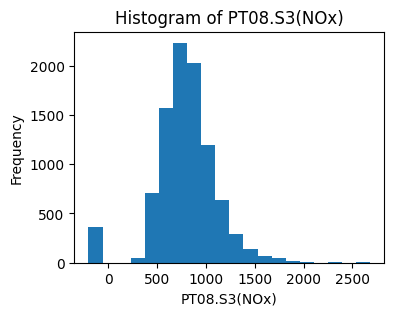

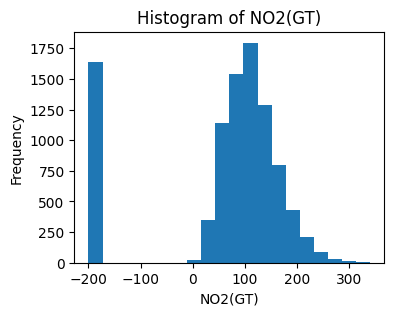

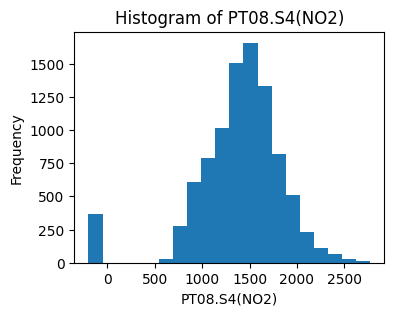

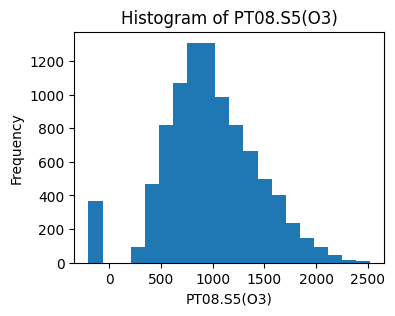

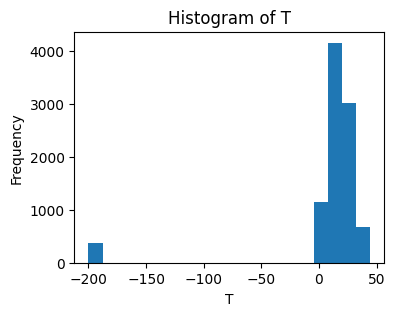

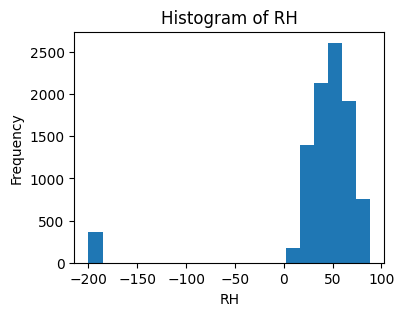

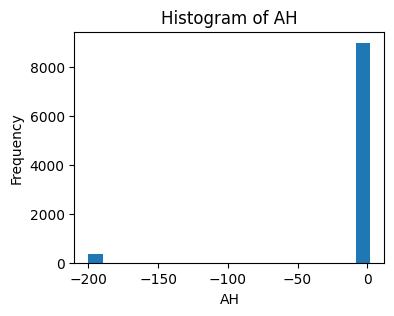

In [213]:
for column in df.columns:
  plt.figure(figsize=(4, 3))
  plt.hist(df[column], bins=20)  # Adjust bins as needed
  plt.title(f"Histogram of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

In [214]:
## Remove error data (which negative)
df = df[(df >= 0).all(axis=1)]

### Scatter Plot 3D of T RH and NOx

In [277]:
import plotly.express as px
import plotly.graph_objects as go

# 3D Scatter Plot of RH vs. PT08.S3(NOx) vs. T
fig_3d_1 = px.scatter_3d(df, x='RH', y='PT08.S3(NOx)', z='T', title='2D Scatter Plot of RH vs. PT08.S3(NOx)')
fig_3d_1.show()

In [278]:
# 2D Scatter Plot of RH vs. PT08.S3(NOx)
fig_2d_2 = px.scatter(df, x='RH', y='PT08.S3(NOx)', title='2D Scatter Plot of RH vs. PT08.S3(NOx)')
fig_2d_2.show()

# Clustering!

## get_linkage

In [217]:
from scipy.cluster.hierarchy import dendrogram

def get_linkage(model):
    # needed for visualization
    # from: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    return linkage_matrix

In [218]:
X = df.drop("PT08.S3(NOx)", axis = 1)
X = df.drop('RH', axis = 1)
X = X.to_numpy(dtype=np.float32)

print('X:', X.shape, X.dtype)

X: (827, 12) float32


## Simple Model

In [204]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

model = AgglomerativeClustering(linkage='complete',
                                distance_threshold=0, # to calculate the full tree
                                n_clusters=None)
model = model.fit(X)

In [219]:
model.labels_

array([439, 733, 482, 675, 749, 767, 757, 763, 651, 687, 635, 688, 415,
       747, 599, 618, 474, 425, 576, 672, 729, 462, 779, 535, 505, 683,
       547, 449, 775, 488, 667, 541, 551, 485, 427, 697, 489, 721, 803,
       734, 504, 825, 590, 585, 720, 435, 584, 466, 758, 737, 443, 549,
       470, 424, 614, 433, 601, 566, 641, 457, 484, 712, 513, 707, 524,
       570, 479, 510, 815, 533, 783, 640, 416, 567, 515, 713, 653, 572,
       469, 461, 793, 546, 811, 769, 610, 625, 594, 685, 527, 467, 799,
       420, 477, 450, 807, 723, 440, 623, 609, 548, 534, 624, 530, 647,
       464, 730, 531, 608, 637, 413, 739, 437, 797, 583, 480, 529, 487,
       478, 605, 661, 418, 645, 722, 532, 785, 715, 776, 429, 442, 709,
       568, 761, 819, 499, 717, 575, 744, 557, 772, 525, 765, 569, 787,
       808, 459, 455, 561, 710, 284, 283, 539, 444, 617, 451, 755, 287,
       756, 556, 764, 497, 665, 619, 602, 417, 446, 431, 595, 591, 809,
       795, 650, 813, 648, 745, 804, 759, 692, 816, 628, 636, 66

In [220]:
model.children_

array([[ 575,  576],
       [ 551,  552],
       [ 598,  599],
       ...,
       [1645, 1648],
       [1647, 1649],
       [1650, 1651]])

### Dendrogram (Full)

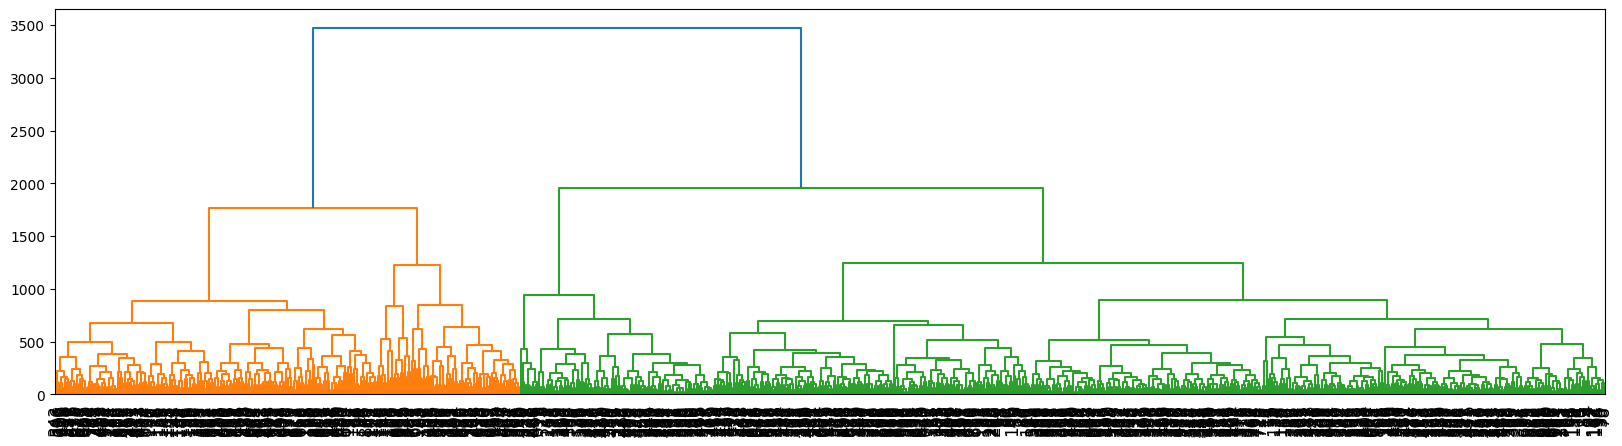

In [221]:
# get linkages
links = get_linkage(model)
# plot the dendrogram
fig, ax = plt.subplots(figsize=(20, 5))
dendrogram(links,
           leaf_rotation=90,
           leaf_font_size=12,
           ax=ax);

## Normalize the movement

Each stock has different valuation, we should not compare them directly. Instead, if we normalize the whole movement as a "unit" vector. They can be compared more equitably.

Assumption: Threshold = 0.3

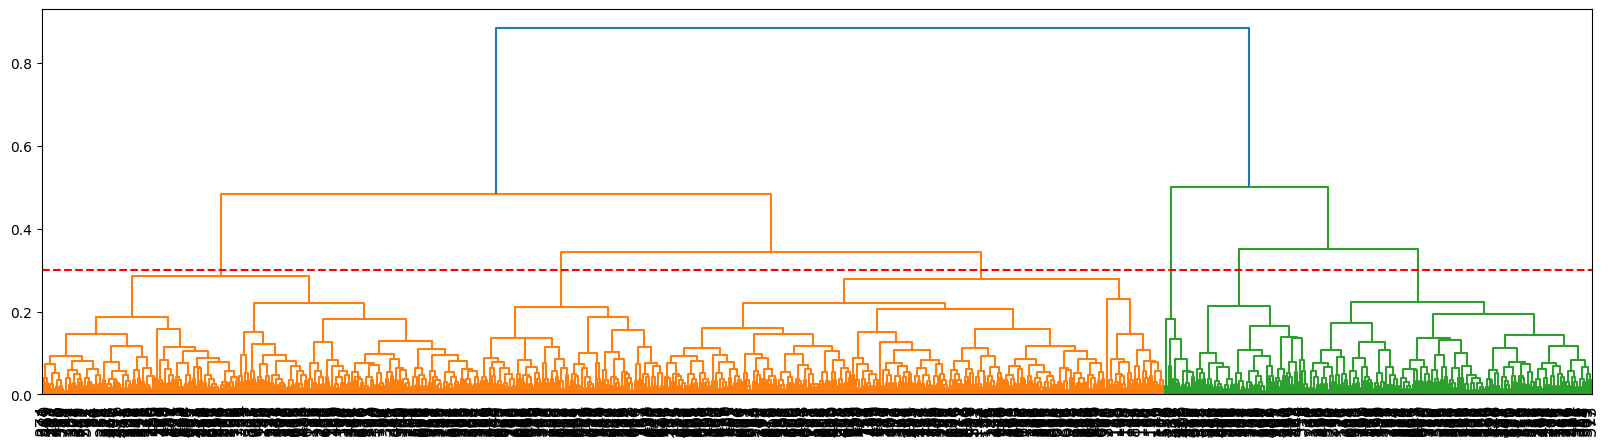

In [229]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

# normalize each row to be a unit vector
X_norm = normalize(X)

model = AgglomerativeClustering(linkage='complete',
                                distance_threshold=0,
                                n_clusters=None)
model = model.fit(X_norm)

links = get_linkage(model)

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(20, 5))
dendrogram(links,
           leaf_rotation=90,
           leaf_font_size=12,
           ax=ax);
plt.axhline(y=0.30, color='r', linestyle='--')
plt.show()

At distance = 0.3, We can splited T with **6** clusters.

## Final Model

In [225]:
model2 = AgglomerativeClustering(n_clusters = 6, linkage = 'ward')
y_pred = model2.fit_predict(X)

In [226]:
y_pred

array([1, 2, 2, 1, 2, 2, 4, 4, 4, 5, 5, 4, 2, 2, 2, 4, 4, 2, 1, 2, 2, 1,
       0, 3, 0, 1, 4, 4, 4, 4, 4, 5, 5, 4, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0,
       0, 3, 0, 0, 0, 1, 2, 2, 4, 4, 2, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 4, 4, 4, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1,
       0, 3, 0, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 3, 0, 0, 0, 0, 1, 1, 0, 3,
       3, 3, 0, 0, 2, 1, 2, 4, 4, 4, 2, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 3, 0, 1, 1, 2, 2, 4, 4, 2, 0, 3, 0, 0, 0, 0, 1, 2, 1, 2, 0,
       3, 3, 3, 0, 0, 0, 1, 2, 4, 4, 2, 0, 3, 2, 2, 0, 0, 0, 1, 2, 4, 4,
       4, 4, 5, 5, 4, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       4, 4, 4, 4, 4, 1, 0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 4, 4, 4, 5,
       5, 5, 5, 5, 4, 1, 0, 2, 2, 4, 2, 2, 2, 2, 2, 1, 0, 0, 1, 2, 4, 4,
       4, 4, 5, 4, 2, 2, 1, 0, 1, 1, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4,

In [227]:
df['cluster'] = y_pred
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,cluster
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,1
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,1
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2


In [242]:
for cluster_num in df.sort_values('cluster')['cluster'].unique():
  cluster_data = df[df['cluster'] == cluster_num]
  print(f"Cluster {cluster_num + 1} Summary:")
  print(f"Number of data points: {len(cluster_data)}")
  print("Descriptive Statistics:")
  print(cluster_data.describe())
  print("\n-------------------------------------------------------------------------")

Cluster 1 Summary:
Number of data points: 159
Descriptive Statistics:
           CO(GT)  PT08.S1(CO)    NMHC(GT)    C6H6(GT)  PT08.S2(NMHC)  \
count  159.000000   159.000000  159.000000  159.000000     159.000000   
mean     3.806289  1477.515723  434.842767   18.666038    1255.163522   
std      0.727984    83.812695  182.284085    3.322037      96.688975   
min      2.300000  1295.000000   93.000000   10.900000    1010.000000   
25%      3.200000  1416.500000  261.500000   15.800000    1173.000000   
50%      3.900000  1466.000000  451.000000   19.100000    1271.000000   
75%      4.350000  1534.500000  584.500000   21.000000    1323.500000   
max      6.100000  1808.000000  808.000000   27.000000    1478.000000   

          NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  159.000000    159.000000  159.000000    159.000000   159.000000   
mean   232.622642    710.654088  132.056604   1921.610063  1501.522013   
std     49.060629     79.296191   18.832454    128

### Define range of cluster

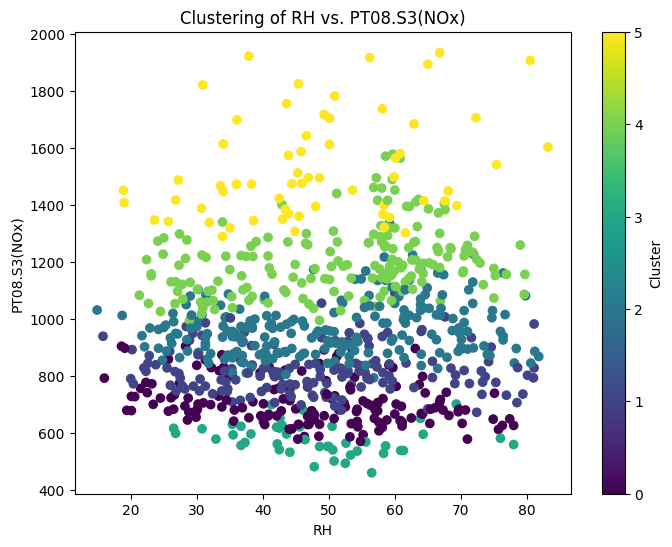

In [279]:
plt.figure(figsize=(8, 6))
plt.scatter(df['RH'], df['PT08.S3(NOx)'], c=df['cluster'], cmap='viridis')
plt.xlabel('RH')
plt.ylabel('PT08.S3(NOx)')
plt.title('Clustering of RH vs. PT08.S3(NOx)')
plt.colorbar(label='Cluster')
plt.show()

In [272]:
for cluster_num in df.sort_values('cluster')['cluster'].unique():
  cluster_data = df[df['cluster'] == cluster_num]
  print(f"Cluster {cluster_num + 1} Summary:")
  print(f"RH range: [{cluster_data['RH'].min()}, {cluster_data['RH'].max()}]")
  print(f"PT08.S3(NOx) range: [{cluster_data['PT08.S3(NOx)'].min()}, {cluster_data['PT08.S3(NOx)'].max()}]")
  print("------------------------------------------------------------")

Cluster 1 Summary:
RH range: [16.0, 78.0]
PT08.S3(NOx) range: [571.0, 905.0]
------------------------------------------------------------
Cluster 2 Summary:
RH range: [15.8, 81.1]
PT08.S3(NOx) range: [673.0, 1092.0]
------------------------------------------------------------
Cluster 3 Summary:
RH range: [14.9, 81.8]
PT08.S3(NOx) range: [794.0, 1337.0]
------------------------------------------------------------
Cluster 4 Summary:
RH range: [26.5, 78.0]
PT08.S3(NOx) range: [461.0, 702.0]
------------------------------------------------------------
Cluster 5 Summary:
RH range: [21.3, 79.7]
PT08.S3(NOx) range: [996.0, 1579.0]
------------------------------------------------------------
Cluster 6 Summary:
RH range: [18.9, 83.2]
PT08.S3(NOx) range: [1290.0, 1935.0]
------------------------------------------------------------


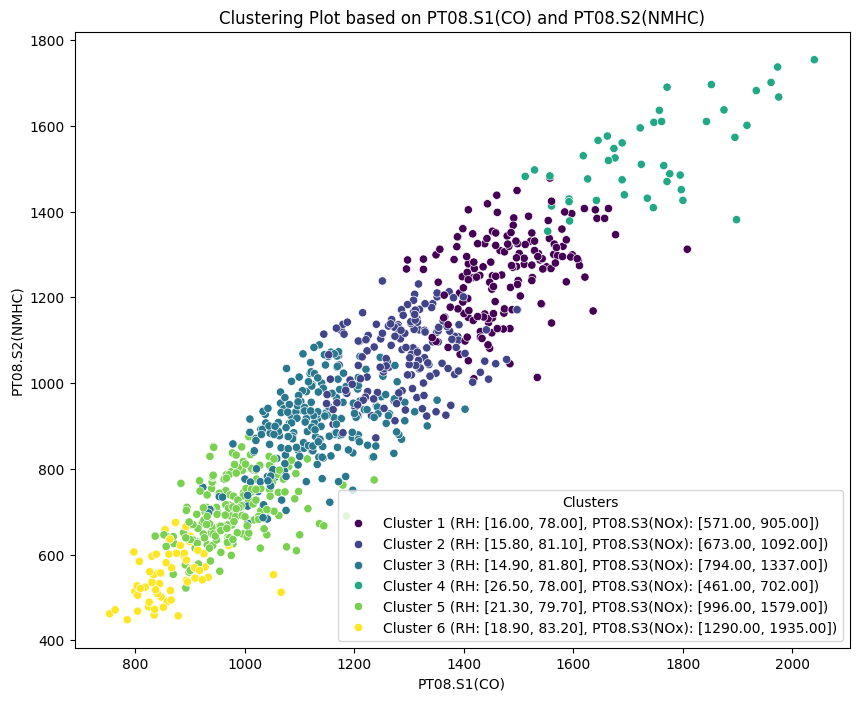

In [274]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PT08.S1(CO)', y='PT08.S2(NMHC)', hue='cluster', data=df, palette='viridis')
plt.title('Clustering Plot based on PT08.S1(CO) and PT08.S2(NMHC)')
plt.xlabel('PT08.S1(CO)')
plt.ylabel('PT08.S2(NMHC)')

# Add legend with cluster ranges
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = []
for cluster_num in df.sort_values('cluster')['cluster'].unique():
  cluster_data = df[df['cluster'] == cluster_num]
  rh_range = f"RH: [{cluster_data['RH'].min():.2f}, {cluster_data['RH'].max():.2f}]"
  nox_range = f"PT08.S3(NOx): [{cluster_data['PT08.S3(NOx)'].min():.2f}, {cluster_data['PT08.S3(NOx)'].max():.2f}]"
  new_labels.append(f"Cluster {cluster_num + 1} ({rh_range}, {nox_range})")

plt.legend(handles, new_labels, title='Clusters')
plt.savefig('clustering_plot.png')
plt.show()

In [233]:
df.sort_values(by='cluster')

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,cluster
552,4.5,1491.0,721.0,23.3,1385.0,223.0,685.0,165.0,1915.0,1486.0,24.3,30.1,0.9012,0
493,3.1,1636.0,342.0,15.6,1168.0,207.0,721.0,110.0,1926.0,1438.0,13.8,58.2,0.9129,0
494,4.1,1580.0,644.0,19.9,1295.0,230.0,639.0,115.0,1957.0,1489.0,13.2,61.1,0.9256,0
517,4.2,1510.0,505.0,19.8,1291.0,342.0,675.0,94.0,1949.0,1435.0,9.5,69.6,0.8273,0
519,4.6,1512.0,737.0,21.0,1323.0,304.0,631.0,139.0,2001.0,1677.0,16.2,48.6,0.8892,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1.0,882.0,44.0,2.5,621.0,61.0,1346.0,56.0,1216.0,403.0,16.6,38.6,0.7236,5
1095,0.8,875.0,35.0,2.3,603.0,48.0,1370.0,48.0,1206.0,385.0,15.1,43.9,0.7487,5
1094,0.6,833.0,40.0,1.6,553.0,40.0,1476.0,45.0,1180.0,373.0,14.4,45.9,0.7476,5
1092,0.5,804.0,31.0,1.1,505.0,34.0,1718.0,37.0,1148.0,329.0,12.8,49.3,0.7285,5


# Conclusion

This notebook demonstrates the application of hierarchical clustering on the Air Quality UCI dataset.

**Overall Process:**

1. **Data Preparation:**
   - Imported the dataset from a provided URL.
   - Removed unnecessary columns (Date, Time).
   - Handled missing values by dropping rows with NaN.
   - Converted data types to float and replaced ',' with '.' for numerical consistency.
   - Removed rows with negative values, indicating potential errors.

2. **Exploratory Data Analysis (EDA):**
   - Visualized data distributions using histograms for each feature.
   - Created 3D and 2D scatter plots to understand relationships between variables like Relative Humidity (RH), NOx concentration, and Temperature (T).

3. **Hierarchical Clustering:**
   - **Model Building:** Used `AgglomerativeClustering` from scikit-learn to build the hierarchical model.
   - **Dendrogram Visualization:** Plotted a dendrogram to visualize the hierarchical structure of clusters.
   - **Normalization:** Normalized the data using `normalize()` to account for different scales among features, promoting a more equitable comparison.
   - **Finding Optimal Number of Clusters (K):** Used the dendrogram and a horizontal line to identify an appropriate number of clusters based on the distance at which the clusters naturally separate. The notebook shows an example using a threshold of 0.3, resulting in 6 clusters.
   - **Linkage Method:** 'ward' linkage was used for the final clustering model.

4. **Final Model and Results:**
   - **Final Model:** The final model was built with 6 clusters and 'ward' linkage.
   - **Cluster Assignments:** Each data point was assigned to a cluster based on the model's prediction.
   - **Cluster Analysis:** The notebook analyzed the characteristics of each cluster (e.g., the range of RH and NOx values).
   - **Visualization:** A scatter plot was used to visualize the clusters based on RH and NOx, showing the distinct groups identified by the clustering algorithm.



**Dataset:**

The dataset used is the Air Quality UCI dataset, which contains various air quality measurements like CO, NOx, RH, and temperature taken over a period of time.

**Choosing the Right "K":**

The optimal number of clusters, 'K', was determined by analyzing the dendrogram. A threshold distance was selected where the branches naturally separate, suggesting a sensible grouping of the data. In this case, a threshold of 0.3 resulted in 6 clusters.

**Choosing the Right "Linkage":**
The notebook used 'ward' linkage for the final model, which aims to minimize the variance within clusters.


**Results:**

The clustering process successfully divided the data into 6 clusters based on the features considered. The results were summarized by showing descriptive statistics and the range of RH and NOx values within each cluster. The scatter plots visually represented the clustering patterns and differences between clusters based on various features.



In essence, this notebook guides you through building a hierarchical clustering model, choosing appropriate parameters, and interpreting the results. The Air Quality dataset is used as an example, but this methodology can be adapted for clustering various other types of data.
